<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/9_6_Concise_Implementation_of_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.6 :

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from d2l import torch as d2l
import numpy as np
import pandas as pd

In [ ]:
nn.RNN??

In [ ]:
class RNN(d2l.Module):

  def __init__(self, num_inputs, num_hiddens):
    super().__init__()
    self.save_hyperparameters()
    self.rnn = nn.RNN(self.num_inputs, self.num_hiddens)

  def forward(self, inputs, H=None):
    return self.rnn(inputs, H)

In [ ]:
test = RNN(5, 2)

In [ ]:
test.rnn.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[-0.4648,  0.5814,  0.6805, -0.6782, -0.5332],
                      [-0.5703, -0.5141, -0.5761,  0.2657, -0.0886]])),
             ('weight_hh_l0', tensor([[ 0.1581, -0.3863],
                      [ 0.0569, -0.3145]])),
             ('bias_ih_l0', tensor([-0.4120,  0.6458])),
             ('bias_hh_l0', tensor([-0.3909,  0.3593]))])

In [ ]:
for p in test.rnn.parameters():
  print(p.shape)

torch.Size([2, 5])
torch.Size([2, 2])
torch.Size([2])
torch.Size([2])


In [ ]:
X = torch.randn(100, 1, 5)
print(f"X shape = {X.shape}")

out1, out2 = test(X)

X shape = torch.Size([100, 1, 5])


In [ ]:
print(type(out1))
print(type(out2))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
out1.shape

torch.Size([100, 1, 2])

In [ ]:
out2.shape

torch.Size([1, 1, 2])

In [ ]:
out1[-1]

tensor([[ 0.9565, -0.5944]], grad_fn=<SelectBackward0>)

In [ ]:
out2[0]

tensor([[ 0.9565, -0.5944]], grad_fn=<SelectBackward0>)

In [ ]:
torch.swapaxes??

In [ ]:
x = torch.arange(8).reshape(2, 2, 2)
x

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])

In [ ]:
torch.swapaxes(x, 0, 1)

tensor([[[0, 1],
         [4, 5]],

        [[2, 3],
         [6, 7]]])

In [ ]:
class RNNLM(d2l.RNNLMScratch):

  def init_params(self):
    self.linear = nn.LazyLinear(self.vocab_size)
  
  def output_layer(self, hiddens):
    return self.linear(hiddens).swapaxes(0, 1)

In [ ]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)

In [ ]:
model.predict("it has", 20, data.vocab)

'it haszzzzzzzzzzzzzzzzzzzz'

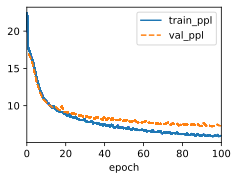

In [ ]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict("it has", 100, data.vocab)

'it has ally the trave fith the trecention the trave fith the trecention the trave fith the trecention the '

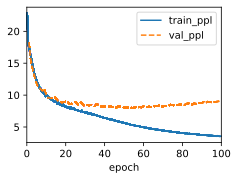

In [ ]:
# data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=128)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=0.5, num_gpus=1)
trainer.fit(model, data)

In [ ]:
model.predict("it has", 100, data.vocab)

'it has sean ther the somen in a fourth the bere that foum a monsthat there is a moment we and aneasthree a'

### Q2:

In [ ]:
nn.RNN??

In [ ]:
rnn_layer = nn.RNN(input_size=16, hidden_size=8)
inp = torch.randn(50, 100, 16) # (num_steps, batch_size, num_inputs)
print(f"input.shape = {inp.shape}")

outputs, state = rnn_layer(inp, None)

input.shape = torch.Size([50, 100, 16])


In [ ]:
print(len(outputs))
print(outputs[0].shape)
print(outputs[1].shape)
print(outputs[-1].shape)
print(state.shape)

50
torch.Size([100, 8])
torch.Size([100, 8])
torch.Size([100, 8])
torch.Size([1, 100, 8])


In [ ]:
comb_layer = nn.Sequential(
    nn.RNN(32, 16),
    nn.Linear(16, 1)
)

inp = torch.randn(50, 10, 32)
print(f"inp.shape = {inp.shape}")

inp.shape = torch.Size([50, 10, 32])


In [ ]:
class RNN_auto(nn.Module):

  def __init__(self, num_inputs, num_hiddens):
    super().__init__()
    self.num_inputs = num_inputs
    self.num_hiddens = num_hiddens
    self.rnn = nn.RNN(self.num_inputs, self.num_hiddens)
    self.fc = nn.Linear(self.num_hiddens, 1)

  def forward(self, inputs):
    O, H = self.rnn(inputs, None)
    out = self.fc(H)
    return out

In [ ]:
class Data():

  def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
    self.batch_size = batch_size
    self.T = T
    self.num_train = num_train
    self.tau = tau
    self.time = torch.arange(1, self.T+1, dtype=torch.float32)
    self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.02

In [ ]:
import matplotlib.pyplot as plt

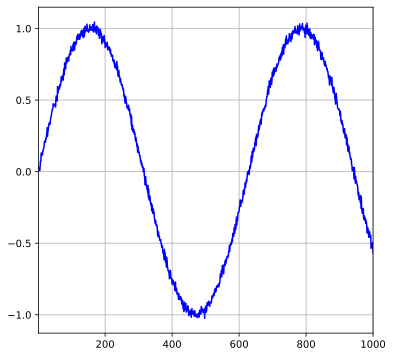

In [ ]:
data = Data()

plt.figure(figsize=(6, 6))
plt.grid()
plt.plot(data.time, data.x, color='blue')
plt.xlim((1, 1000))
plt.show()

In [ ]:
model = RNN_auto(num_inputs=32, num_hiddens=16)

In [ ]:
inp = torch.rand(100, 10, 32)
out = model(inp)
print(out.shape)

torch.Size([1, 10, 1])


# trying to define a simple RNN

In [ ]:
import numpy as np

In [ ]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

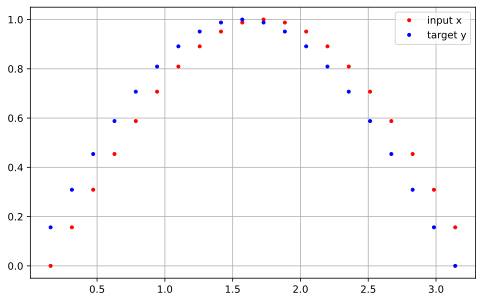

In [ ]:
plt.figure(figsize=(8, 5))

seq_len = 20
time_steps = np.linspace(0, np.pi, seq_len+1)
data = np.sin(time_steps)
data.resize((seq_len + 1, 1))

# print(data.shape)

x = data[:-1] # all but last
y = data[1:] # start from the 2nd input

plt.plot(time_steps[1:], x, 'r.', label= "input x")
plt.plot(time_steps[1:], y, 'b.', label="target y")

plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
nn.RNN??

In [ ]:
class RNN(nn.Module):

  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.input_size = input_size
    self.output_size = output_size
    self.n_layers = n_layers

    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, X, hidden=None):

    # X <-- (batch_size, seq_len, input_size)
    # hidden <-- (n_layers, batch_size, hidden_dim)
    # r_out <-- (batch_size, time_step, output_size)

    batch_size = X.shape[0]

    r_out, hidden = self.rnn(X, hidden)
    r_out = r_out.reshape(-1, self.hidden_dim)

    output = self.fc(r_out)
    return output, hidden

In [ ]:
# let's check the input and output dimensions : 

test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced data points : 

time_steps = np.linspace(0, np.pi, seq_len)
data = np.sin(time_steps).reshape((seq_len, 1))

test_input = torch.from_numpy(data).unsqueeze(0) 
print(test_input.shape) # (batch_size, seq_len, input_size)

torch.Size([1, 20, 1])


In [ ]:
print(test_input)

tensor([[[0.0000e+00],
         [1.6459e-01],
         [3.2470e-01],
         [4.7595e-01],
         [6.1421e-01],
         [7.3572e-01],
         [8.3717e-01],
         [9.1577e-01],
         [9.6940e-01],
         [9.9658e-01],
         [9.9658e-01],
         [9.6940e-01],
         [9.1577e-01],
         [8.3717e-01],
         [7.3572e-01],
         [6.1421e-01],
         [4.7595e-01],
         [3.2470e-01],
         [1.6459e-01],
         [1.2246e-16]]], dtype=torch.float64)


In [ ]:
test_out, test_hidden = test_rnn(test_input)
print(f"test_out.shape = {test_out.shape}")
print(f"test_hidden.shape = {test_hidden.shape}")

RuntimeError: ignored

## Q2:

In [ ]:
# first let's prepare the data

X = np.random.rand(5)
print(X.shape)

NameError: ignored

In [ ]:
a = np.random.rand(5)
print(a)

[0.12214523 0.13153943 0.144174   0.82346699 0.63424392]


In [ ]:
order = 2

In [ ]:
df = pd.DataFrame(X)
df.head()

,0
0,0.963520
1,0.475124
2,0.032785
3,0.159047
4,0.512762


In [ ]:
df.shift(-1)

,0
0,0.475124
1,0.032785
2,0.159047
3,0.512762
4,0.578729
...,...
49995,0.677028
49996,0.719176
49997,0.430740
49998,0.649506
